# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

import os

#from google.colab import drive
#from google.colab import files

In [3]:
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

# DATA LOADING

In [138]:
## COLAB

# To connect to Drive
#drive.mount("/content/drive")
# To avoid data type warning during import
#raw_df = pd.read_csv("/content/drive/My Drive/GUVI/household_power_consumption.txt", delimiter=";", dtype=str)

## JUPYTER
raw_df = pd.read_csv("household_power_consumption.txt", delimiter=";", dtype=str)

# RAW DATA EDA

## 1.DATA OVERVIEW

In [8]:
raw_df.shape

(2075259, 9)

### INSIGHT - 1

    * Large Dataset with 2M rows

In [9]:
raw_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


1. **date**: Date in format dd/mm/yyyy -------> between **December 2006 and November 2010** (47 months)

2. **time**: time in format hh:mm:ss

3. **global_active_power**: household global minute-averaged active power (in kilowatt)

4. **global_reactive_power**: household global minute-averaged reactive power (in kilowatt)

5. **voltage**: minute-averaged voltage (in volt)

6. **global_intensity**: household global minute-averaged current intensity (in ampere)

7. **sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8. **sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9. **sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

10. **active energy consumed every minute** (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3 -------> (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)

11. **LOCATION**: Sceaux (7km of Paris, France)

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Date                   object
 1   Time                   object
 2   Global_active_power    object
 3   Global_reactive_power  object
 4   Voltage                object
 5   Global_intensity       object
 6   Sub_metering_1         object
 7   Sub_metering_2         object
 8   Sub_metering_3         object
dtypes: object(9)
memory usage: 142.5+ MB


In [12]:
raw_df.shape

(2075259, 9)

In [13]:
raw_df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## 2.TYPECASTING

In [140]:
df = raw_df.copy()

In [142]:
df['datetime'] = pd.to_datetime(raw_df['Date'].astype(str)+' '+raw_df['Time'].astype(str), format="%d/%m/%Y %H:%M:%S", errors="coerce")

df['datetime'].describe()

count                          2075259
mean     2008-12-06 07:12:59.999994112
min                2006-12-16 17:24:00
25%                2007-12-12 00:18:30
50%                2008-12-06 07:13:00
75%                2009-12-01 14:07:30
max                2010-11-26 21:02:00
Name: datetime, dtype: object

In [144]:
num_col = ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Numerical Type Conversion
for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
datetime                 datetime64[ns]
dtype: object

In [19]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [146]:
# Setting DateTime as index
df.set_index('datetime', inplace=True)

In [83]:
df.index.to_series().describe()

count                          2075259
mean     2008-12-06 07:12:59.999994112
min                2006-12-16 17:24:00
25%                2007-12-12 00:18:30
50%                2008-12-06 07:13:00
75%                2009-12-01 14:07:30
max                2010-11-26 21:02:00
Name: datetime, dtype: object

In [21]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

### INSIGHT - 2

    * Type conversion to float for all numerical values
    * Date and Time can be converted as index which would be helpful as time-series analysis for future

## 3.DATA QUALITY CHECKS

In [23]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [78]:
for col in num_col:
    missing_rows = df[col].isnull().sum()
    total_rows = len(df[col])
    missing_ratio = missing_rows/total_rows
    print(f"Missing Ratio of {col} : {(missing_ratio*100):.2f}%")

Missing Ratio of Global_active_power : 1.25%
Missing Ratio of Global_reactive_power : 1.25%
Missing Ratio of Voltage : 1.25%
Missing Ratio of Global_intensity : 1.25%
Missing Ratio of Sub_metering_1 : 1.25%
Missing Ratio of Sub_metering_2 : 1.25%
Missing Ratio of Sub_metering_3 : 1.25%


In [24]:
df.duplicated().sum()

0

### INSIGHT - 3 

    * Powerpulse Dataset Comprises of 1.25% (25979 rows) missing power calculation metrics except date and time

## 4. UNIVARIATE ANALYSIS

In [26]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [27]:
summary = df[num_col].describe().T
summary['skewness'] = df[num_col].skew()
summary

,count,mean,std,min,25%,50%,75%,max,skewness
Global_active_power,2049280.00,1.09,1.06,0.08,0.31,0.60,1.53,11.12,1.79
Global_reactive_power,2049280.00,0.12,0.11,0.00,0.05,0.10,0.19,1.39,1.26
Voltage,2049280.00,240.84,3.24,223.20,238.99,241.01,242.89,254.15,-0.33
Global_intensity,2049280.00,4.63,4.44,0.20,1.40,2.60,6.40,48.40,1.85
Sub_metering_1,2049280.00,1.12,6.15,0.00,0.00,0.00,0.00,88.00,5.94
Sub_metering_2,2049280.00,1.30,5.82,0.00,0.00,0.00,1.00,80.00,7.09
Sub_metering_3,2049280.00,6.46,8.44,0.00,0.00,1.00,17.00,31.00,0.72


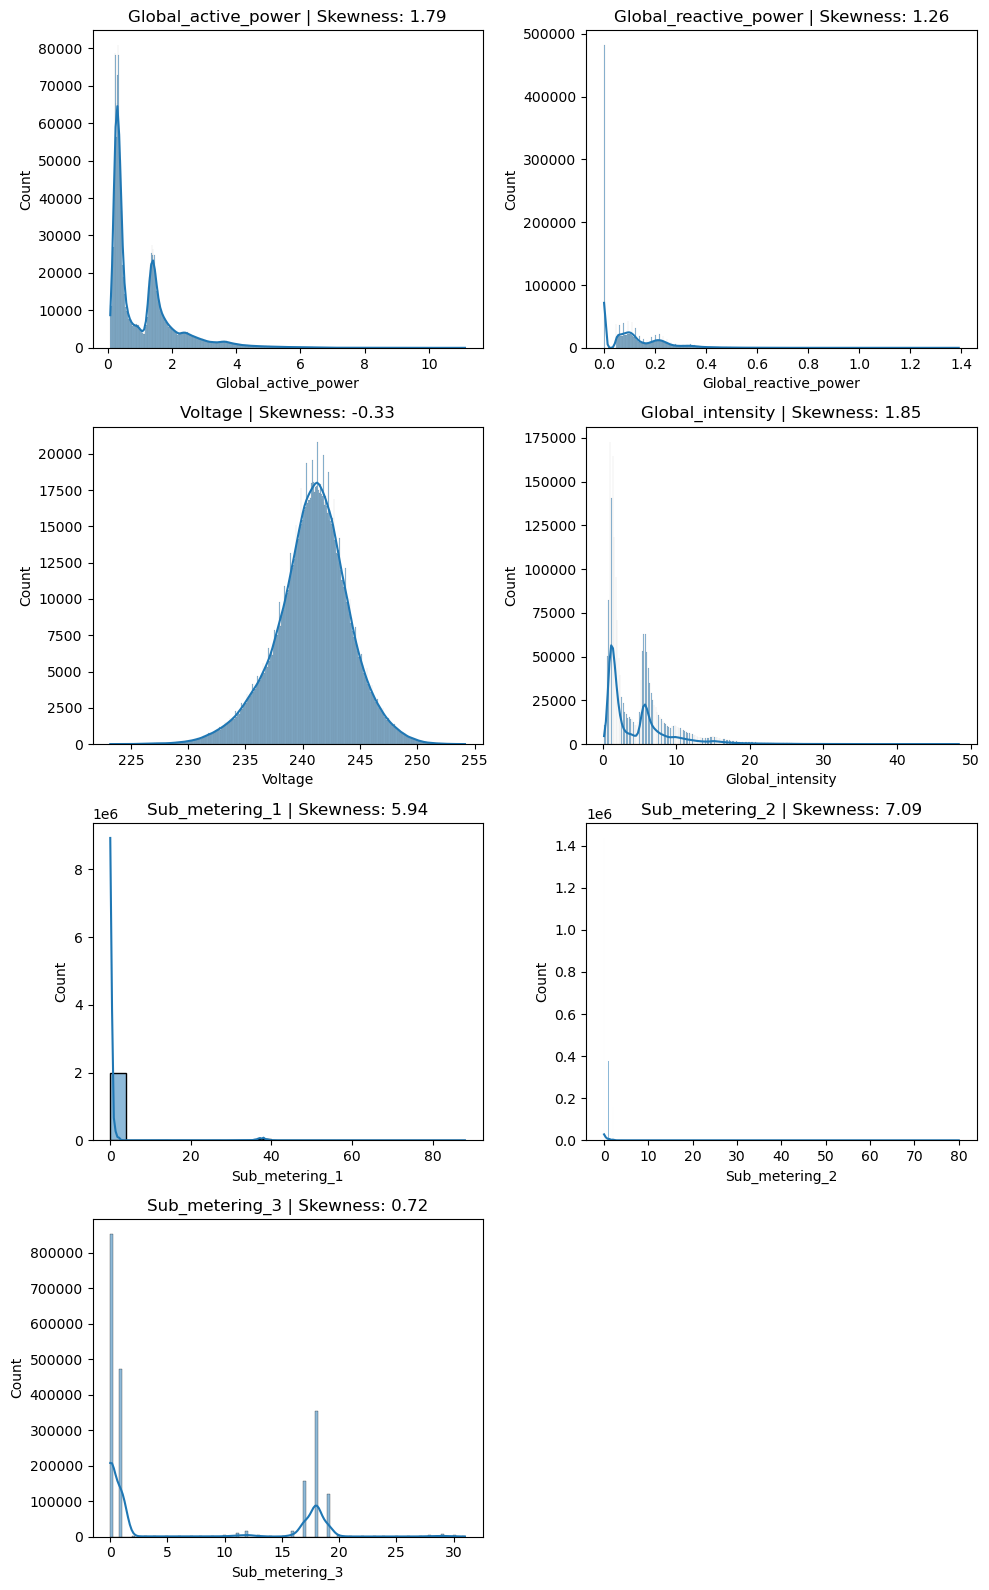

In [67]:
# two column hist plot

num_col = df.select_dtypes(include=['float64']).columns
ncols = 2
nrows = -(-len(num_col) // ncols) # ceiling division else use math.ceil()

fig, axes = plt.subplots(nrows, ncols, figsize=(10, 4*nrows))
axes = axes.flatten() # indexing

for i, col in enumerate(num_col):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"{col} | Skewness: {df[col].skew():.2f}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j]) # remove an unused subplot from a figure

plt.tight_layout()
plt.show()

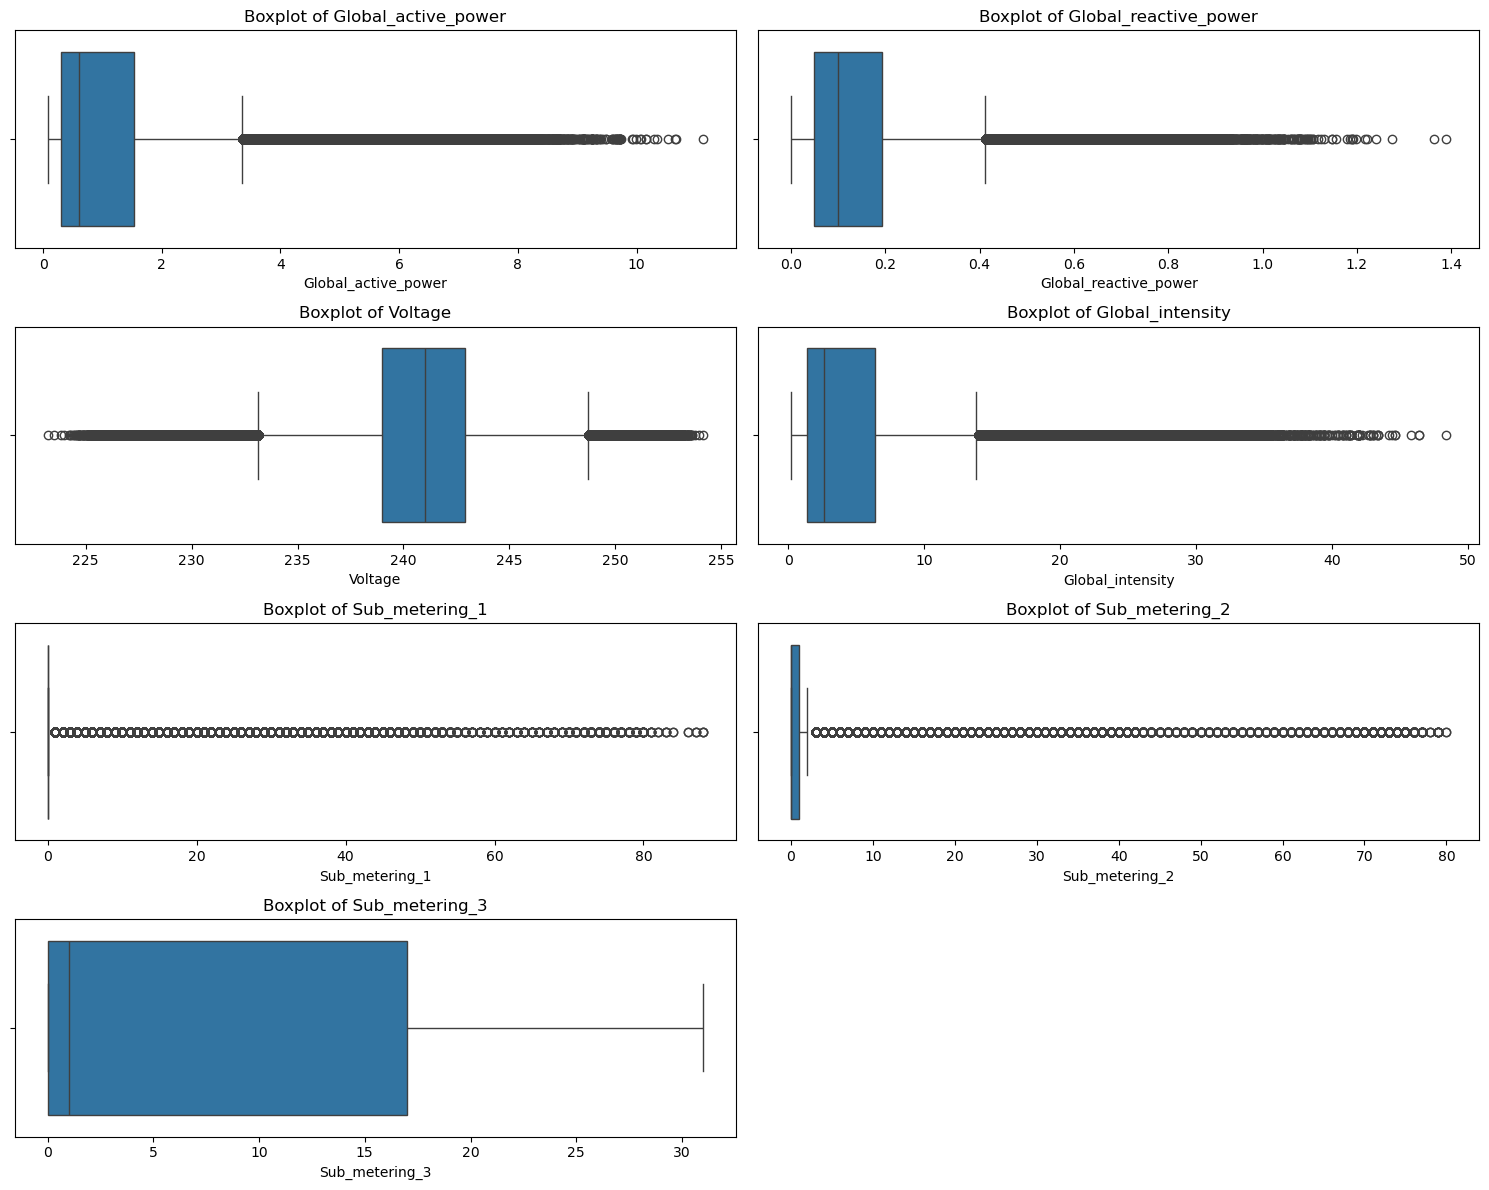

In [69]:
# BOX PLOT

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_col, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### SKEWNESS INSIGHTS - 4

    * Global_active_power      1.79    Highly right skewed
    * Global_reactive_power    1.26    Highly right skewed
    * Voltage                 -0.33    Symmetric but slight left skewed
    * Global_intensity         1.85    Highly right skewed
    * Sub_metering_1           5.94    Extremely right skewed
    * Sub_metering_2           7.09    Extremely right skewed
    * Sub_metering_3           0.72    Moderate right skewed

## 5.OUTLIER DETECTION

In [90]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}:     {len(outliers)} outliers     [{df[col].skew():.2f} skewness]")

Global_active_power:     94907 outliers     [1.79 skewness]
Global_reactive_power:     40420 outliers     [1.26 skewness]
Voltage:     51067 outliers     [-0.33 skewness]
Global_intensity:     100961 outliers     [1.85 skewness]
Sub_metering_1:     169105 outliers     [5.94 skewness]
Sub_metering_2:     77151 outliers     [7.09 skewness]
Sub_metering_3:     0 outliers     [0.72 skewness]


### INSIGHTS - 5

    * These outliers are genuinue since they have been recorded real-time
    * Variations might be due to weekend and holidays

## 6. BIVARIATE ANALYSIS

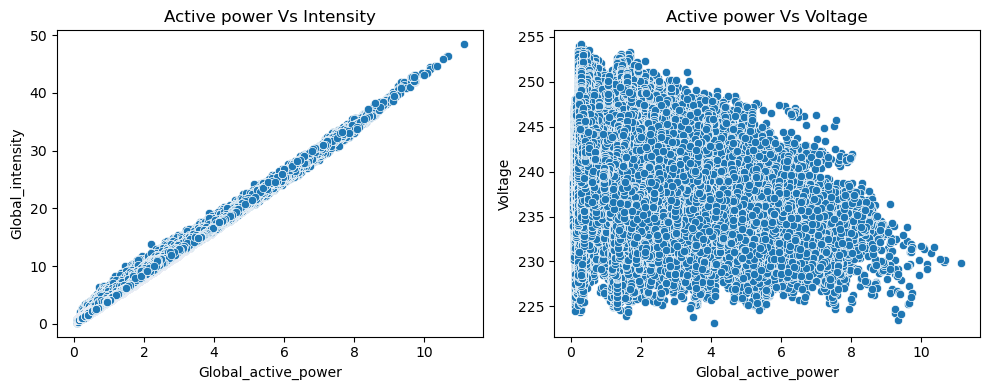

In [95]:
# Scatter plot

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten() # indexing

sns.scatterplot(data=df, x='Global_active_power', y='Global_intensity', ax=axes[0])
axes[0].set_title("Active power Vs Intensity")


sns.scatterplot(data=df, x='Global_active_power', y='Voltage', ax=axes[1])
axes[1].set_title("Active power Vs Voltage")

plt.tight_layout()
plt.show()

### INSIGHT-6

    * Here you could see power increases parallely with current and inversely with voltage

## 7. MULTIVARIATE ANALYSIS

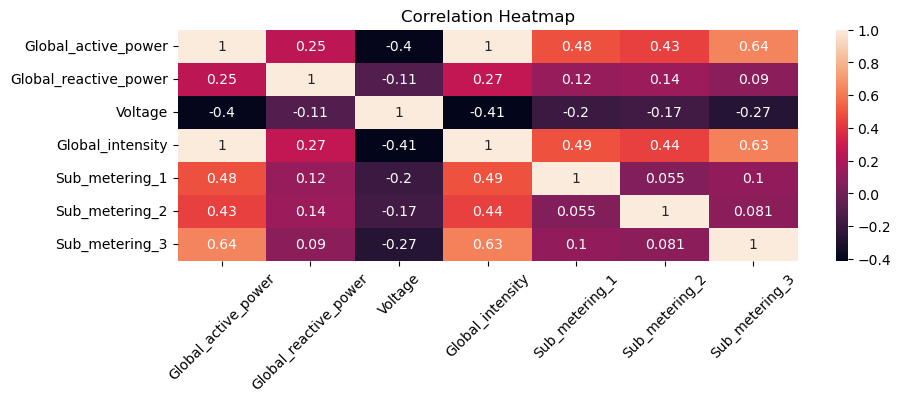

In [99]:
# correlation heatmap

plt.figure(figsize=(10, 3))
ax = sns.heatmap(df[num_col].corr(), annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Correlation Heatmap")
plt.show()

### CORRELATION INSIGHTS - 7

1) Positive linear correlations

    * Global_active_power AND Global_intensity have high positive (1)
    * Global_active_power AND Sub_metering_3 have moderate positive (0.64)
    * Global_intensity AND Sub_metering_3 have moderate positive (0.63)
       --> High power result in high intensity and submetering3
      
2) Negative linear correlation

    * Global_intensity AND Voltage have moderate negative (-0.41)
    * Global_active_power AND Voltage have moderate negative (-0.4)
       --> High Power & Intensity result in Low voltage

3) No Correlation

    * Sub_metering_1 AND Sub_metering_2 have negligible (0.055)
    * Global_reactive_power WITH most of variables have almost negligible

## 8. TIME-SERIES PATTERNS

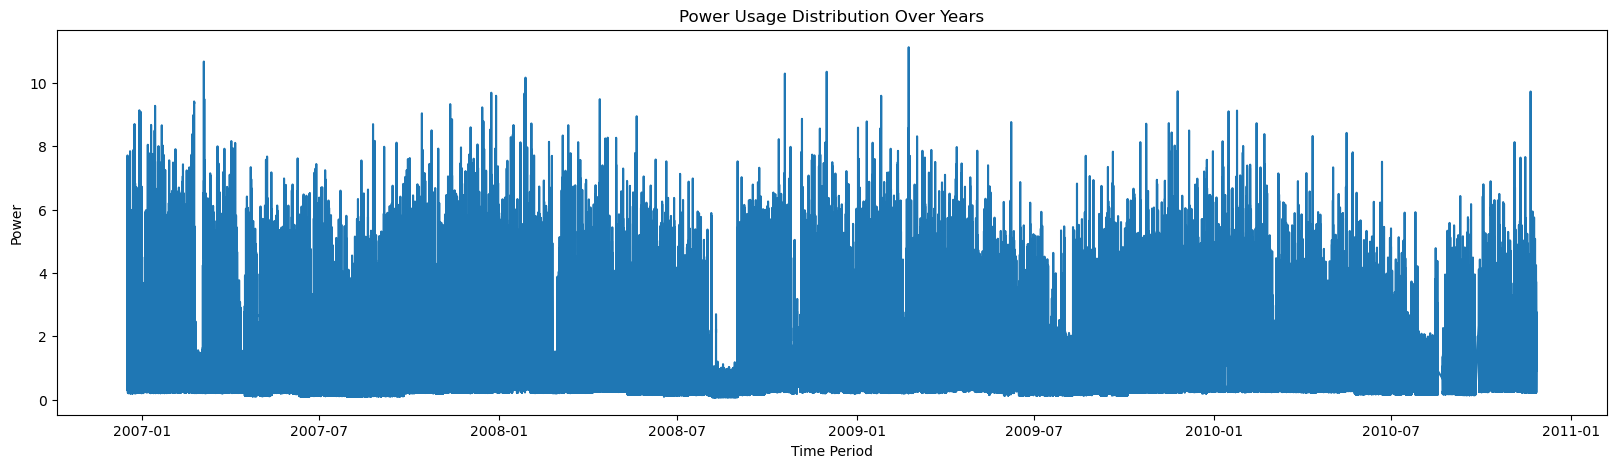

In [103]:
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(20,5))
sns.lineplot(data=df, x=df.index, y='Global_active_power')
plt.xlabel("Time Period")
plt.ylabel("Power")
plt.title("Power Usage Distribution Over Years")
plt.show()

### INSIGHT - 8

    * Power is consumed higher during winter season (12,1,2 months)

# DATA PREPROCESSING

## 1. HANDLING MISSING DATA

In [150]:
df[df.isnull().any(axis=1)].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-21 11:23:00,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
# Filling NULL values using interpolate time method

df[df.select_dtypes(include=['number']).columns] = (df.select_dtypes(include=['number']).interpolate(method="time").bfill().ffill())

In [158]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## 2. PARSING DATE AND TIME INTO SEPARATE FEATURES

In [161]:
df.index = pd.to_datetime(df.index, format="%d/%m/%Y %H:%M:%S")

df['year'] = df.index.year
df['month'] = df.index.month
df['date'] = df.index.day

df['hour'] = df.index.hour
df['minute'] = df.index.minute

df['day'] = df.index.day_name()
df['is_weekend'] = df.index.day_name().isin(['Saturday', 'Sunday'])

In [163]:
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,date,hour,minute,day,is_weekend
datetime,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.22,0.42,234.84,18.40,0.00,1.00,17.00,2006,12,16,17,24,Saturday,True
2006-12-16 17:25:00,16/12/2006,17:25:00,5.36,0.44,233.63,23.00,0.00,1.00,16.00,2006,12,16,17,25,Saturday,True


In [165]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
year                       int32
month                      int32
date                       int32
hour                       int32
minute                     int32
day                       object
is_weekend                  bool
dtype: object

## 3. CREATING ADDITIONAL FEATURES SUCH AS DAILY AVERAGE, PEAK HOURS AND ROLLING AVERAGE PER DAY

In [168]:
df['daily_average'] = df.groupby('Date')['Global_active_power'].transform('mean')

In [170]:
df['peak_hours'] = df.groupby('hour')['Global_active_power'].transform('max')

In [172]:
df['rolling_avg_1h'] = df.groupby(['year', 'month', 'day'])['Global_active_power'].transform(lambda x: x.rolling(window=60, min_periods=1).mean())
df['rolling_avg_12h'] = df.groupby(['year', 'month', 'day'])['Global_active_power'].transform(lambda x: x.rolling(window=720, min_periods=1).mean())

In [174]:
cols = ["daily_average", "peak_hours", "rolling_avg_1h", "rolling_avg_12h"]

for col in cols:
  df[col] = df[col].round(2)

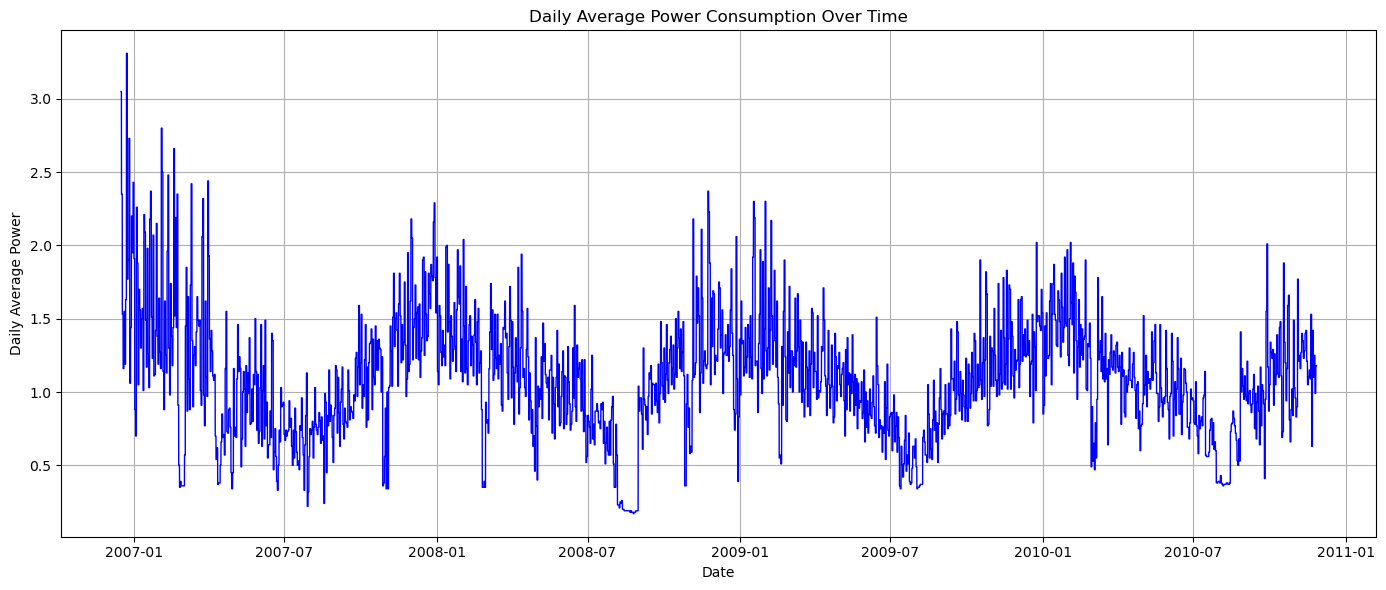

In [180]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['daily_average'], color='blue', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Daily Average Power')
plt.title('Daily Average Power Consumption Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

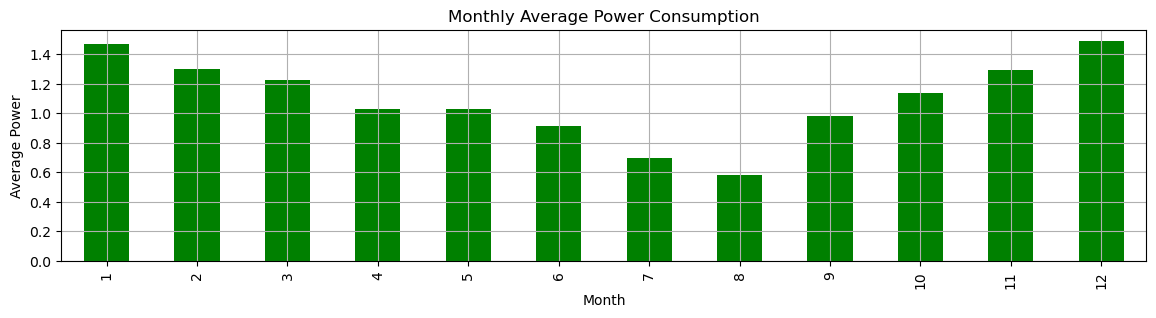

In [190]:
# Group by month
monthly_trend = df.groupby(df["month"])["Global_active_power"].mean()

# Plot
plt.figure(figsize=(14, 3))
monthly_trend.plot(kind="bar", title="Monthly Average Power Consumption", color='green')
plt.xlabel("Month")
plt.ylabel("Average Power")
plt.grid()
plt.show()

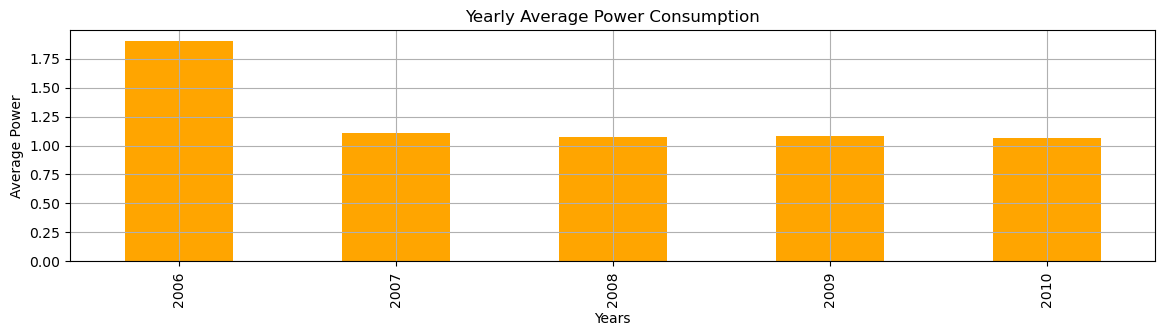

In [194]:
# Group by year
monthly_trend = df.groupby(df["year"])["Global_active_power"].mean()

# Plot
plt.figure(figsize=(14, 3))
monthly_trend.plot(kind="bar", title="Yearly Average Power Consumption", color='orange')
plt.xlabel("Years")
plt.ylabel("Average Power")
plt.grid()
plt.show()

In [176]:
df.tail(3)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,date,hour,minute,day,is_weekend,daily_average,peak_hours,rolling_avg_1h,rolling_avg_12h
datetime,,,,,,,,,,,,,,,,,,,,
2010-11-26 21:00:00,26/11/2010,21:00:00,0.94,0.00,239.82,3.80,0.00,0.00,0.00,2010,11,26,21,0,Friday,False,1.18,9.41,1.16,1.43
2010-11-26 21:01:00,26/11/2010,21:01:00,0.93,0.00,239.70,3.80,0.00,0.00,0.00,2010,11,26,21,1,Friday,False,1.18,9.41,1.14,1.43
2010-11-26 21:02:00,26/11/2010,21:02:00,0.93,0.00,239.55,3.80,0.00,0.00,0.00,2010,11,26,21,2,Friday,False,1.18,9.41,1.13,1.42


In [178]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'year', 'month', 'date', 'hour', 'minute', 'day',
       'is_weekend', 'daily_average', 'peak_hours', 'rolling_avg_1h',
       'rolling_avg_12h'],
      dtype='object')

# FEATURE ENGINEERING

## 1. RELEVANT FEATURES FOR PREDICTING GLOBAL ACTIVE POWER CONSUMPTION

*   global_active_energy_consumption(wh per minute) = global_active_power*1000/60

In [197]:
df['global_active_energy_consumption'] = (df['Global_active_power'] * 1000/60).round(2)

In [199]:
df['Submetered_energy'] = (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']).round(2)
df['Unmetered_energy'] = (df['global_active_energy_consumption'] - df['Submetered_energy']).round(2)

In [201]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,...,minute,day,is_weekend,daily_average,peak_hours,rolling_avg_1h,rolling_avg_12h,global_active_energy_consumption,Submetered_energy,Unmetered_energy
datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.22,0.42,234.84,18.40,0.00,1.00,17.00,2006,...,24,Saturday,True,3.05,11.12,4.22,4.22,70.27,18.00,52.27
2006-12-16 17:25:00,16/12/2006,17:25:00,5.36,0.44,233.63,23.00,0.00,1.00,16.00,2006,...,25,Saturday,True,3.05,11.12,4.79,4.79,89.33,17.00,72.33
2006-12-16 17:26:00,16/12/2006,17:26:00,5.37,0.50,233.29,23.00,0.00,2.00,17.00,2006,...,26,Saturday,True,3.05,11.12,4.98,4.98,89.57,19.00,70.57
2006-12-16 17:27:00,16/12/2006,17:27:00,5.39,0.50,233.74,23.00,0.00,1.00,17.00,2006,...,27,Saturday,True,3.05,11.12,5.08,5.08,89.80,18.00,71.80
2006-12-16 17:28:00,16/12/2006,17:28:00,3.67,0.53,235.68,15.80,0.00,1.00,17.00,2006,...,28,Saturday,True,3.05,11.12,4.80,4.80,61.10,18.00,43.10


## 2. INCORPORATING EXTERNAL WEATHER DATA

In [204]:
def get_season(month):
  if month in [12,1,2]:
    return "Winter"
  elif month in [3,4,5]:
    return "Summer"
  elif month in [6,7,8]:
    return "Spring"
  elif month in [9,10,11]:
    return "Autumn"


In [206]:
df['season'] = df['month'].apply(get_season)

In [207]:
df['season'].unique()

array(['Winter', 'Summer', 'Spring', 'Autumn'], dtype=object)

In [210]:
# Loading weather extracted csv file
#weather_df =  pd.read_csv("/content/drive/My Drive/GUVI/paris_sceaux_weather.csv", index_col='time')

weather_df =  pd.read_csv("paris_sceaux_weather.csv", index_col='time')

In [212]:
weather_df.index = pd.to_datetime(weather_df.index)

In [214]:
weather_df.head(3)

,temp,dwpt,rhum,prcp,wdir,wspd,pres
time,,,,,,,
2006-12-16 00:00:00,6.00,3.00,81.00,0.50,210.00,14.80,1023.90
2006-12-16 01:00:00,5.30,2.60,83.00,0.00,200.00,7.60,1023.70
2006-12-16 02:00:00,4.90,2.40,84.00,0.00,200.00,11.20,1023.30


In [216]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,...,day,is_weekend,daily_average,peak_hours,rolling_avg_1h,rolling_avg_12h,global_active_energy_consumption,Submetered_energy,Unmetered_energy,season
datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.22,0.42,234.84,18.40,0.00,1.00,17.00,2006,...,Saturday,True,3.05,11.12,4.22,4.22,70.27,18.00,52.27,Winter
2006-12-16 17:25:00,16/12/2006,17:25:00,5.36,0.44,233.63,23.00,0.00,1.00,16.00,2006,...,Saturday,True,3.05,11.12,4.79,4.79,89.33,17.00,72.33,Winter
2006-12-16 17:26:00,16/12/2006,17:26:00,5.37,0.50,233.29,23.00,0.00,2.00,17.00,2006,...,Saturday,True,3.05,11.12,4.98,4.98,89.57,19.00,70.57,Winter
2006-12-16 17:27:00,16/12/2006,17:27:00,5.39,0.50,233.74,23.00,0.00,1.00,17.00,2006,...,Saturday,True,3.05,11.12,5.08,5.08,89.80,18.00,71.80,Winter
2006-12-16 17:28:00,16/12/2006,17:28:00,3.67,0.53,235.68,15.80,0.00,1.00,17.00,2006,...,Saturday,True,3.05,11.12,4.80,4.80,61.10,18.00,43.10,Winter


In [218]:
merged_df = pd.merge_asof(df, weather_df, left_index=True, right_index=True, direction="backward", tolerance=pd.Timedelta('59min'))
merged_df.tail(1)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,...,Submetered_energy,Unmetered_energy,season,temp,dwpt,rhum,prcp,wdir,wspd,pres
datetime,,,,,,,,,,,,,,,,,,,,,
2010-11-26 21:02:00,26/11/2010,21:02:00,0.93,0.00,239.55,3.80,0.00,0.00,0.00,2010,...,0.00,15.53,Autumn,0.80,-0.80,89.00,0.70,190.00,7.60,1006.40


In [220]:
merged_df.isnull().sum()[merged_df.isnull().sum() > 0]

temp    52440
dwpt    52440
rhum    52440
prcp    52440
wdir    52440
wspd    52440
pres    52440
dtype: int64

In [222]:
weather_col = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']

for col in weather_col:
    missing_rows = merged_df[col].isnull().sum()
    total_rows = len(merged_df[col])
    missing_ratio = missing_rows/total_rows
    print(f"Missing ratio of {col} : {missing_ratio*100 :.2f}%")

Missing ratio of temp : 2.53%
Missing ratio of dwpt : 2.53%
Missing ratio of rhum : 2.53%
Missing ratio of prcp : 2.53%
Missing ratio of wdir : 2.53%
Missing ratio of wspd : 2.53%
Missing ratio of pres : 2.53%


In [227]:
merged_df[weather_col] = merged_df[weather_col].interpolate(method="time").bfill().ffill()

In [229]:
merged_df[weather_col] = merged_df[weather_col].round(1)

In [231]:
merged_df.isnull().sum()[merged_df.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
#merged_df.to_csv("/content/drive/My Drive/GUVI/merged_weather_power.csv")

merged_df.to_csv('powerpulse_weather_preprocessed.csv')

#files.download('powerpulse_weather_preprocessed.csv')